CODE TO RESTRUCTURE THE DATA

In [20]:
import pandas as pd

# Load the data from data.csv
data = pd.read_csv("data.csv")

# Drop the first 52 rows (including the header and explanation rows)
data = data.iloc[51:, :]

# Reset the index
data.reset_index(drop=True, inplace=True)

# Rename the columns based on the label in the 53rd row
data.columns = data.iloc[0]

# Drop the first row (label row)
data = data.drop(0)

# Reset the index again
data.reset_index(drop=True, inplace=True)

# Map the categories of planets to encoded classes
data['planet_class'] = data['koi_disposition'].map({'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2})


# Drop the columns that are not required
data = data.drop(columns=['koi_disposition','koi_pdisposition','koi_teq_err1','koi_teq_err2','koi_tce_delivname'])

# Save the preprocessed data to pre_processed_data.csv
data.to_csv("pre_processed_data.csv", index=False)



DATA CLEANING(DELETE THE ROWS WITH MISSING VALUES FOR ANY COLUMN STARTING FROM COLUMN D)

In [21]:
import pandas as pd

data = pd.read_csv("pre_processed_data.csv")

# Drop rows where any of the columns starting from the 4th column have missing values
data = data.dropna(subset=data.columns[3:], how='any')

data.to_csv("pre_processed_data.csv", index=False)


DATA NORMALIZATION

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the preprocessed data from pre_processed_data.csv
data = pd.read_csv("pre_processed_data.csv")

# Extract the columns to be scaled (from 4th column to second last column)
columns_to_scale = data.columns[3:-1]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using Min-Max scaling
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the scaled data back to pre_processed_data.csv
data.to_csv("pre_processed_data.csv", index=False)


MODEL TRAINING(ANN)

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Load the preprocessed data from pre_processed_data.csv
data = pd.read_csv("pre_processed_data.csv")

# Extract input features (X) and target variable (y)
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(45, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(50, activation='tanh'),
    Dense(50, activation='tanh'),
    Dense(50, activation='tanh'),
    Dense(50, activation='tanh'),
    Dense(50, activation='tanh'),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes and softmax activation
])


#choose optimizer and set learning rate
optimizer=Adam(learning_rate=0.005)

# Compile the model
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=200,validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/50
25/25 [==============================] - 2s 13ms/step - loss: 0.5691 - accuracy: 0.7340 - val_loss: 0.4314 - val_accuracy: 0.7750
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4190 - accuracy: 0.7835 - val_loss: 0.4070 - val_accuracy: 0.8151
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.7999 - val_loss: 0.3926 - val_accuracy: 0.8335
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.8065 - val_loss: 0.3723 - val_accuracy: 0.8439
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3748 - accuracy: 0.8125 - val_loss: 0.3806 - val_accuracy: 0.8094
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.7953 - val_loss: 0.3921 - val_accuracy: 0.8046
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8230 - val_loss: 0.3654 - val_accuracy: 0.8311
Epoch 8/50
25/25 [=

In [27]:
model.save('ANN.h5')

C:\Users\VAIBHAV JHA\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


EVALUATION MATRIX

49/49 [==============================] - 0s 2ms/step
Precision: 0.8728552496096069
Recall: 0.874439461883408
F1 Score: 0.8735438578942885


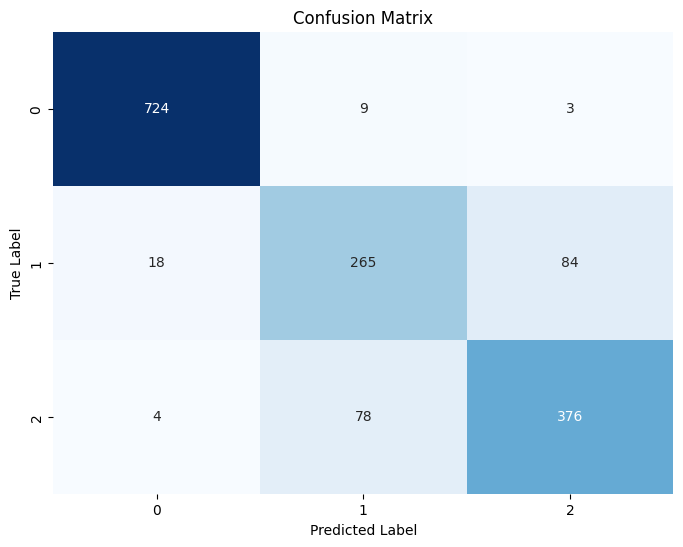

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the classes for test data
y_pred = np.argmax(model.predict(X_test), axis=1)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Model Training(Random Forest Classifier)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the preprocessed data from pre_processed_data.csv
data = pd.read_csv("pre_processed_data.csv")

# Extract input features (X) and target variable (y)
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, 
                                   max_depth=None, 
                                   max_features=25, 
                                   bootstrap=True, 
                                   criterion='entropy', 
                                   random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest classifier on test data
accuracy = rf_model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9071108263933376


Saving Trained Model

In [18]:
# Save the trained XGBoost model
import joblib

joblib.dump(rf_model, 'random_forest.pkl')


['random_forest.pkl']

EVALUATION MATRIX

Precision: 0.9078805497875184
Recall: 0.9071108263933376
F1 Score: 0.9061542215815838


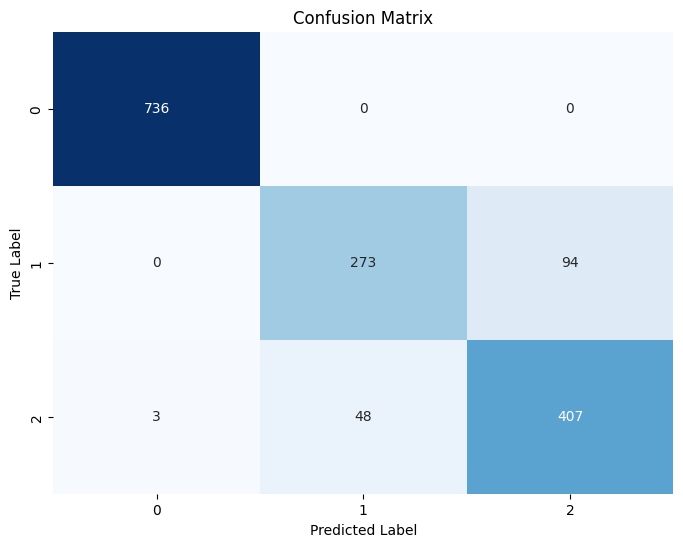

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the classes for test data
y_pred = rf_model.predict(X_test)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Model Training(XG Boost)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data from pre_processed_data.csv
data = pd.read_csv("pre_processed_data.csv")

# Extract input features (X) and target variable (y)
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = XGBClassifier(learning_rate=0.01, n_estimators= 1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')



Test Accuracy: 0.9141575912876362


Saving Trained Model

In [22]:
# Save the trained XGBoost model
import joblib

joblib.dump(rf_model, 'xg_boost.pkl')

['xg_boost.pkl']

EVALUATION MATRIX

Precision: 0.915051160697995
Recall: 0.9141575912876362
F1 Score: 0.9133007567746321


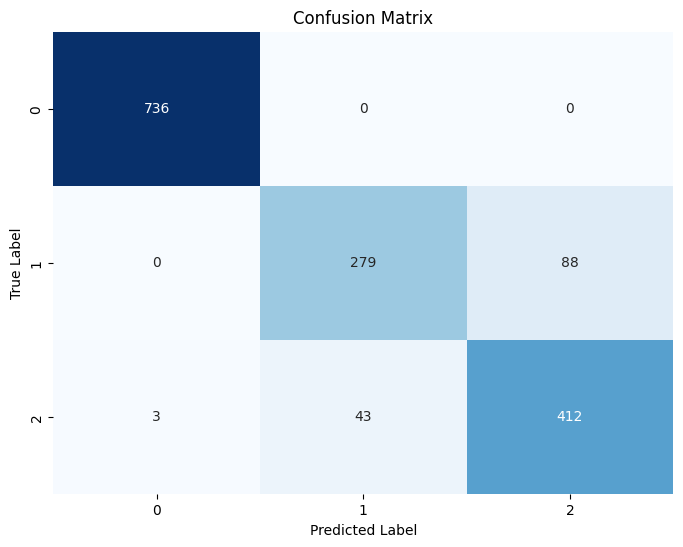

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the classes for test data
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()